# WIP

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

#### Ejercicio:

Compare las distribuciones estimadas de las muestras obtenidas mediante
muestreo por rechazo, contra las distribuciones del posterior que se
conocen por inferencia Bayesiana exacta.

K 1.38963157077e-262
Accepted 1.0


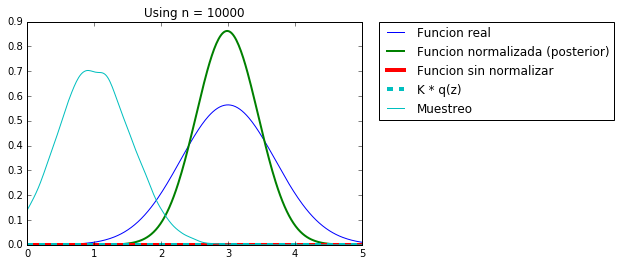

In [131]:
mu = 3
var = 0.5
sig = np.sqrt(var)
N = 10
y = rd.normal(mu, sig, N)

mu0 = 1
sig0 = np.sqrt(0.3)

# Estimation of mean with knonw variance
# Use a gaussian conjugate prior
def posterior(mu0, s20, s2, X, n):
    muml = np.sum(X) / n
    mun = (s2 * mu0 / (n * s20 + s2)) +  n * s20 * muml / (n * s20 + s2)
    sign = 1.0 / ((1.0 / s20) +  (n / s2))
    return mun, np.sqrt(sign)

muk, sigk = posterior(mu0, sig0, var, y, len(y))

def comp_k(y):
    # Params given by maximum likelihood
    muML = np.sum(y) / len(y)
    sigML = sig / len(y) 
    return np.prod(norm.pdf(y, muML, sigML))

k = comp_k(y)
   
def q(z):
    return norm.pdf(z, mu0, sig0)

def draw_q(n):
    return rd.normal(mu0, sig0, size=n)

def pt(z):
    return np.prod(norm.pdf(y, z, sig)) * norm.pdf(z, mu0, sig0)

vec_pt = np.vectorize(pt)

def uni(z0):
    return rd.uniform(0, k * q(z0))

vec_uni = np.vectorize(uni)

def reject(N):
    samples = draw_q(N)
    u = vec_uni(samples)
    prob = vec_pt(np.array(samples))
    valid = []
    for i in range(N):
        if (u[i] <= prob[i]):
            valid.append(samples[i])
    print ('Accepted', len(valid) / float(N))
    return valid

def esti2(N):
    samples = reject(N)
    return stats.gaussian_kde(samples)


x = np.linspace(0, 5, 300)

Nexp = [10000]
def pz(z): # Posterior
    return norm.pdf(z, muk, np.sqrt(sigk))

print ('K', k)
for n in Nexp:
    plt.plot(x, norm.pdf(x, mu, sig), label = 'Funcion real')
    plt.plot(x, pz(x), label='Funcion normalizada (posterior)', linewidth=2)
    plt.plot(x, vec_pt(x), label='Funcion sin normalizar', linewidth=4)
    plt.plot(x, k * q(x), '--',label='K * q(z)', linewidth=4)
    kernel = esti2(n)
    y = kernel(x)
    plt.plot(x, y, 'c',label='Muestreo')
    plt.title("Using n = %d" % (n))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()